# Visualization with Seaborn

Matplotlib has proven to be an incredibly useful and popular visualization tool, but even avid users will admit it often leaves much to be desired.
There are several valid complaints about Matplotlib that often come up:

- Prior to version 2.0, Matplotlib's defaults are not exactly the best choices. 
- Matplotlib's API is relatively low level. Doing sophisticated statistical visualization is possible, but often requires a *lot* of boilerplate code.
- Matplotlib predated Pandas by more than a decade, and thus is not designed for use with Pandas ``DataFrame``s. In order to visualize data from a Pandas ``DataFrame``, you must extract each ``Series`` and often concatenate them together into the right format. It would be nicer to have a plotting library that can intelligently use the ``DataFrame`` labels in a plot.

An answer to these problems is [Seaborn](http://seaborn.pydata.org/). Seaborn provides an API on top of Matplotlib that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas ``DataFrame``s.

To be fair, the Matplotlib team is addressing this: it has recently added the ``plt.style`` tools discussed in [Customizing Matplotlib: Configurations and Style Sheets](04.11-Settings-and-Stylesheets.ipynb), and is starting to handle Pandas data more seamlessly.
The 2.0 release of the library will include a new default stylesheet that will improve on the current status quo.
But for all the reasons just discussed, Seaborn remains an extremely useful addon.

## Seaborn Versus Matplotlib

Here is an example of a simple random-walk plot in Matplotlib, using its classic plot formatting and colors.
We start with the typical imports:

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

Now we create some random walk data:

In [2]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

And do a simple plot:

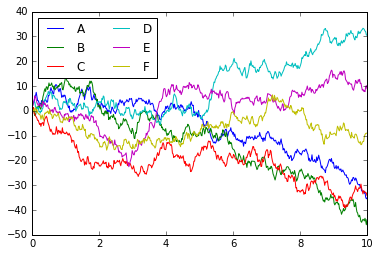

In [3]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Although the result contains all the information we'd like it to convey, it does so in a way that is not all that aesthetically pleasing, and even looks a bit old-fashioned in the context of 21st-century data visualization.

Now let's take a look at how it works with Seaborn.
As we will see, Seaborn has many of its own high-level plotting routines, but it can also overwrite Matplotlib's default parameters and in turn get even simple Matplotlib scripts to produce vastly superior output.
We can set the style by calling Seaborn's ``set()`` method.
By convention, Seaborn is imported as ``sns``:

In [4]:
import seaborn as sns
sns.set()

Now let's rerun the same two lines as before:

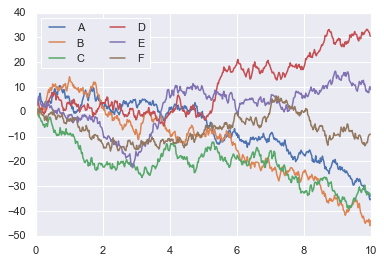

In [5]:
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Ah, much better!

## Exploring Seaborn Plots

The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

Let's take a look at a few of the datasets and plot types available in Seaborn. Note that all of the following *could* be done using raw Matplotlib commands (this is, in fact, what Seaborn does under the hood) but the Seaborn API is much more convenient.

### Histograms, KDE, and densities

Often in statistical data visualization, all you want is to plot histograms and joint distributions of variables.
We have seen that this is relatively straightforward in Matplotlib:

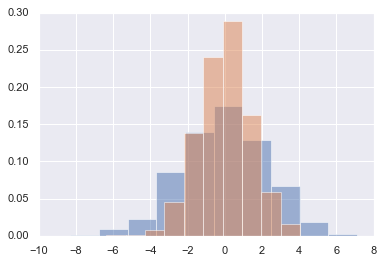

In [6]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation, which Seaborn does with ``sns.kdeplot``:

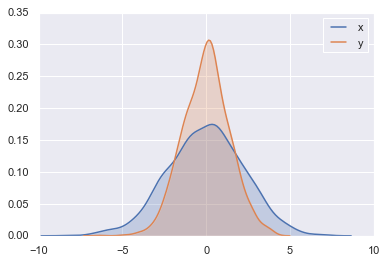

In [7]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

Histograms and KDE can be combined using ``distplot``:

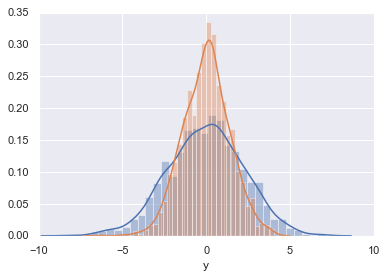

In [8]:
sns.distplot(data['x'])
sns.distplot(data['y']);

If we pass the full two-dimensional dataset to ``kdeplot``, we will get a two-dimensional visualization of the data:

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


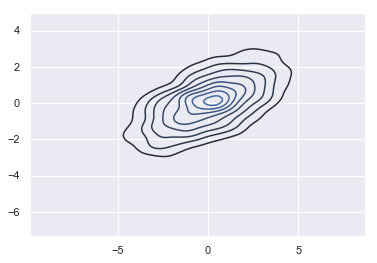

In [9]:
sns.kdeplot(data);

We can see the joint distribution and the marginal distributions together using ``sns.jointplot``.
For this plot, we'll set the style to a white background:

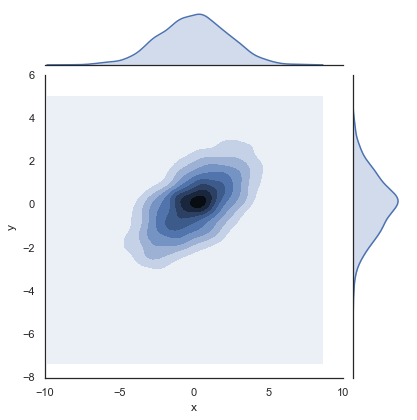

In [10]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

There are other parameters that can be passed to ``jointplot``—for example, we can use a hexagonally based histogram instead:

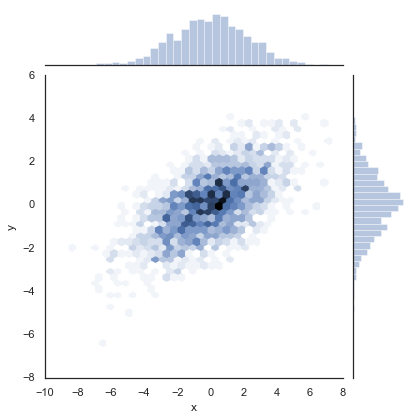

In [11]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

### Pair plots

When you generalize joint plots to datasets of larger dimensions, you end up with *pair plots*. This is very useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of values against each other.

We'll demo this with the well-known Iris dataset, which lists measurements of petals and sepals of three iris species:

In [12]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Visualizing the multidimensional relationships among the samples is as easy as calling ``sns.pairplot``:

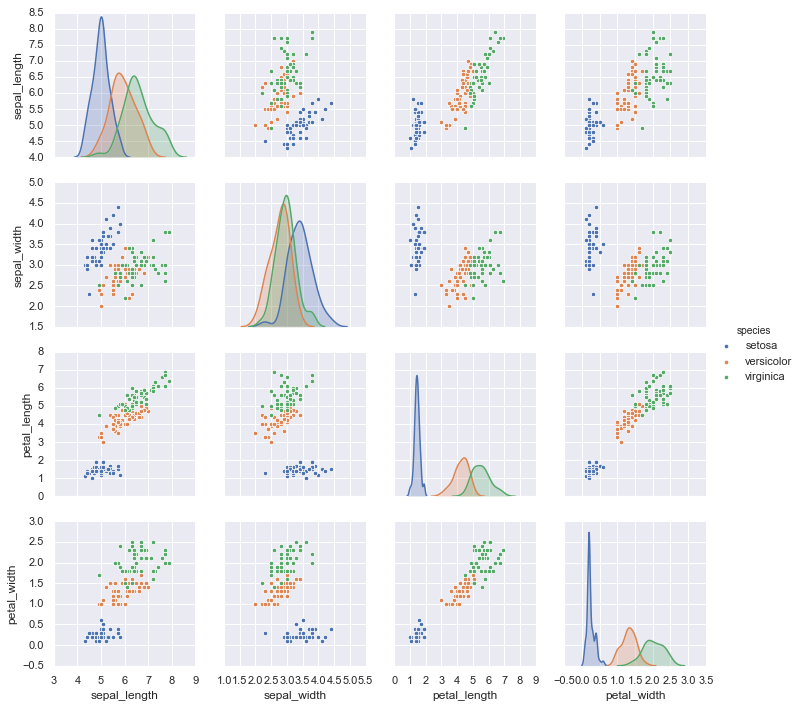

In [13]:
sns.pairplot(iris, hue='species', height=2.5);

### Faceted histograms

Sometimes the best way to view data is via histograms of subsets. Seaborn's ``FacetGrid`` makes this extremely simple.
We'll take a look at some data that shows the amount that restaurant staff receive in tips based on various indicator data:

In [14]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


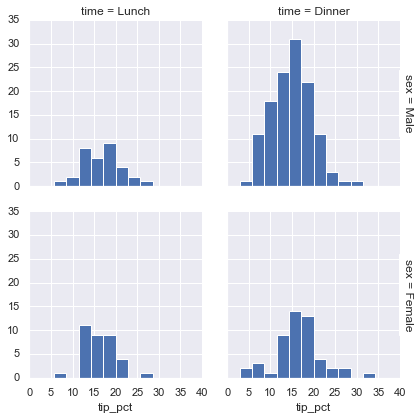

In [15]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### Factor plots

Factor plots can be useful for this kind of visualization as well. This allows you to view the distribution of a parameter within bins defined by any other parameter:

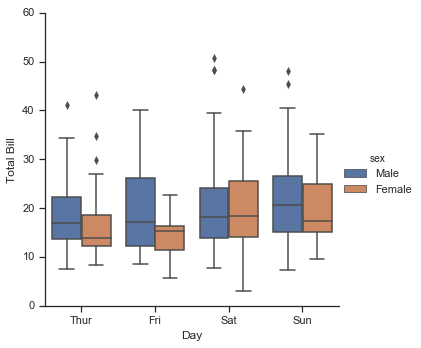

In [16]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

### Joint distributions

Similar to the pairplot we saw earlier, we can use ``sns.jointplot`` to show the joint distribution between different datasets, along with the associated marginal distributions:

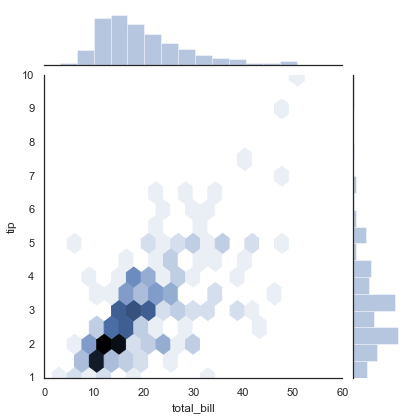

In [17]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

The joint plot can even do some automatic kernel density estimation and regression:

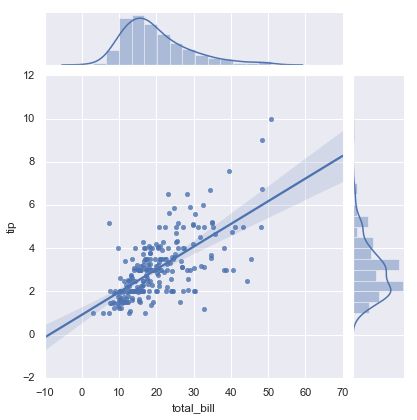

In [18]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg');

### Bar plots

Time series can be plotted using ``sns.factorplot``. In the following example, we'll use the Planets data that we first saw in [Aggregation and Grouping](03.08-Aggregation-and-Grouping.ipynb):

In [19]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


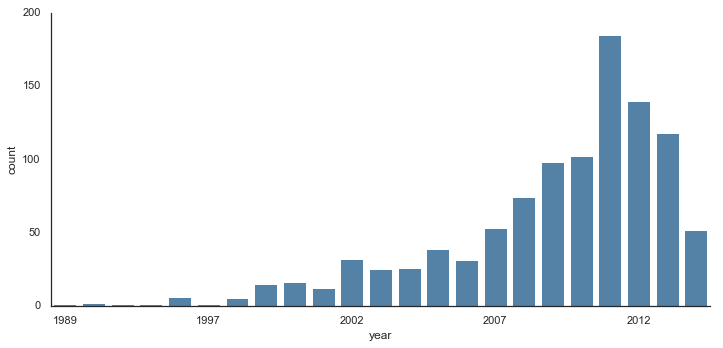

In [20]:
with sns.axes_style('white'):
    g = sns.catplot("year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

We can learn more by looking at the *method* of discovery of each of these planets:

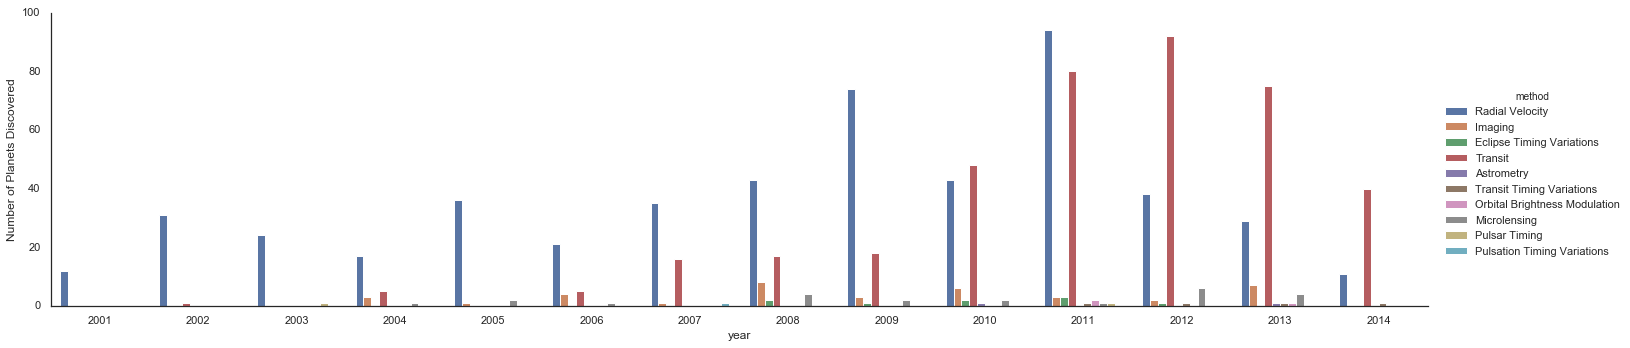

In [21]:
with sns.axes_style('white'):
    g = sns.catplot("year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

## Example: Exploring Marathon Finishing Times

Here we'll look at using Seaborn to help visualize and understand finishing results from a marathon.
scraped the data from sources on the Web, aggregated it and removed any identifying information, and put it on GitHub where it can be downloaded. We will start by downloading the data from the Web, and loading it into Pandas:

In [22]:
!curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  836k    0  2742    0     0   1761      0  0:08:06  0:00:01  0:08:05  1759
 29  836k   29  247k    0     0   101k      0  0:00:08  0:00:02  0:00:06  101k
100  836k  100  836k    0     0   249k      0  0:00:03  0:00:03 --:--:--  249k


In [23]:
data = pd.read_csv('marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


By default, Pandas loaded the time columns as Python strings (type ``object``); we can see this by looking at the ``dtypes`` attribute of the DataFrame:

In [24]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

Let's fix this by providing a converter for the times:

In [25]:
import datetime

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('marathon-data.csv',
                   converters={'split':convert_time, 'final':convert_time})
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [26]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

That looks much better. For the purpose of our Seaborn plotting utilities, let's next add columns that give the times in seconds:

In [41]:
data['split_sec'] = pd.to_timedelta(list(data['split'])).seconds
data['final_sec'] = pd.to_timedelta(list(data['final'])).seconds
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,01:05:38,02:08:51,3938,7731,0.0,30
1,32,M,01:06:26,02:09:28,3986,7768,0.0,30
2,31,M,01:06:49,02:10:42,4009,7842,0.0,30
3,38,M,01:06:16,02:13:45,3976,8025,0.0,30
4,31,M,01:06:32,02:13:59,3992,8039,0.0,30


In [42]:
data.dtypes

age                     int64
gender                 object
split         timedelta64[ns]
final         timedelta64[ns]
split_sec               int64
final_sec               int64
split_frac            float64
age_dec                 int64
dtype: object

To get an idea of what the data looks like, we can plot a ``jointplot`` over the data:

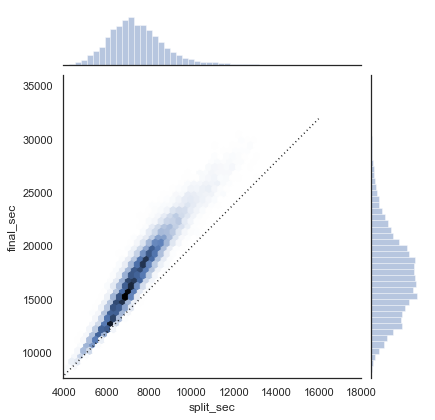

In [43]:
with sns.axes_style('white'):
    g = sns.jointplot("split_sec", "final_sec", data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

The dotted line shows where someone's time would lie if they ran the marathon at a perfectly steady pace. The fact that the distribution lies above this indicates (as you might expect) that most people slow down over the course of the marathon.
If you have run competitively, you'll know that those who do the opposite—run faster during the second half of the race—are said to have "negative-split" the race.

Let's create another column in the data, the split fraction, which measures the degree to which each runner negative-splits or positive-splits the race:

In [44]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,01:05:38,02:08:51,3938,7731,-0.018756,30
1,32,M,01:06:26,02:09:28,3986,7768,-0.026262,30
2,31,M,01:06:49,02:10:42,4009,7842,-0.022443,30
3,38,M,01:06:16,02:13:45,3976,8025,0.009097,30
4,31,M,01:06:32,02:13:59,3992,8039,0.006842,30


Where this split difference is less than zero, the person negative-split the race by that fraction.
Let's do a distribution plot of this split fraction:

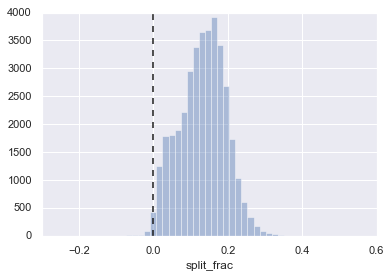

In [45]:
sns.distplot(data['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--");

In [46]:
sum(data.split_frac < 0)

251

Out of nearly 40,000 participants, there were only 250 people who negative-split their marathon.

Let's see whether there is any correlation between this split fraction and other variables. We'll do this using a ``pairgrid``, which draws plots of all these correlations:

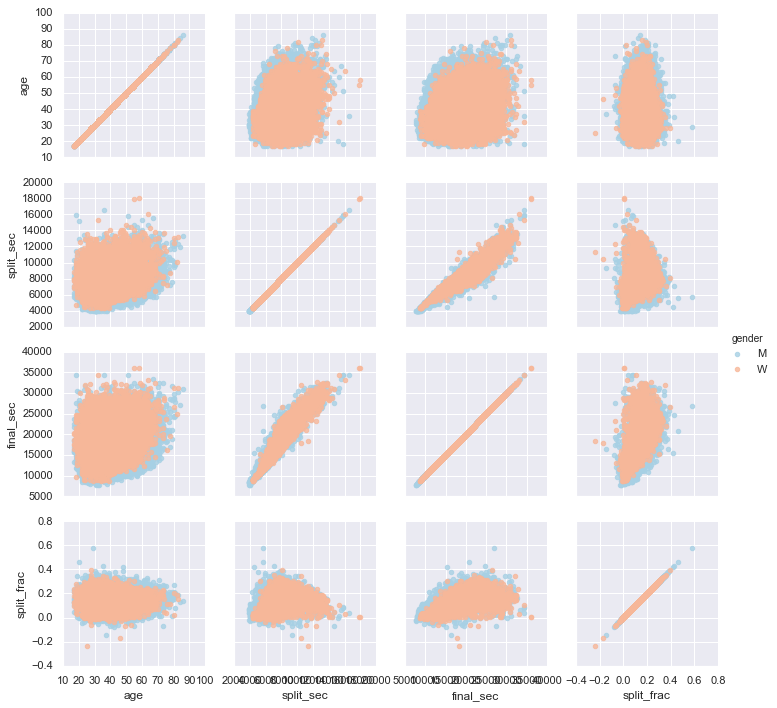

In [47]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

It looks like the split fraction does not correlate particularly with age, but does correlate with the final time: faster runners tend to have closer to even splits on their marathon time.
(We see here that Seaborn is no panacea for Matplotlib's ills when it comes to plot styles: in particular, the x-axis labels overlap. Because the output is a simple Matplotlib plot, however, the methods in [Customizing Ticks](04.10-Customizing-Ticks.ipynb) can be used to adjust such things if desired.)

The difference between men and women here is interesting. Let's look at the histogram of split fractions for these two groups:

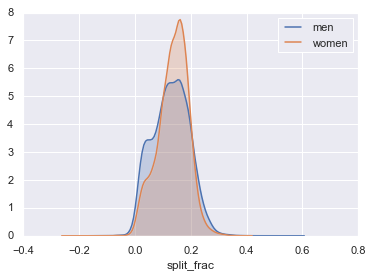

In [48]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True)
plt.xlabel('split_frac');

The interesting thing here is that there are many more men than women who are running close to an even split!
This almost looks like some kind of bimodal distribution among the men and women. Let's see if we can suss-out what's going on by looking at the distributions as a function of age.

A nice way to compare distributions is to use a *violin plot*

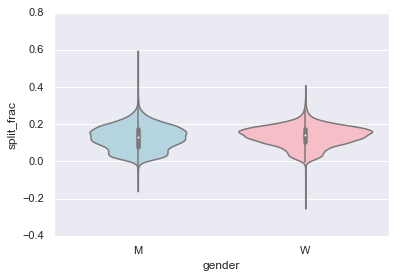

In [49]:
sns.violinplot("gender", "split_frac", data=data,
               palette=["lightblue", "lightpink"]);

This is yet another way to compare the distributions between men and women.

Let's look a little deeper, and compare these violin plots as a function of age. We'll start by creating a new column in the array that specifies the decade of age that each person is in:

In [50]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,01:05:38,02:08:51,3938,7731,-0.018756,30
1,32,M,01:06:26,02:09:28,3986,7768,-0.026262,30
2,31,M,01:06:49,02:10:42,4009,7842,-0.022443,30
3,38,M,01:06:16,02:13:45,3976,8025,0.009097,30
4,31,M,01:06:32,02:13:59,3992,8039,0.006842,30


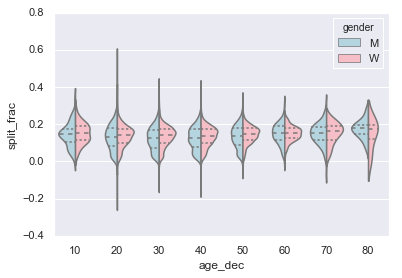

In [51]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot("age_dec", "split_frac", hue="gender", data=data,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

Looking at this, we can see where the distributions of men and women differ: the split distributions of men in their 20s to 50s show a pronounced over-density toward lower splits when compared to women of the same age (or of any age, for that matter).

Also surprisingly, the 80-year-old women seem to outperform *everyone* in terms of their split time. This is probably due to the fact that we're estimating the distribution from small numbers, as there are only a handful of runners in that range:

In [52]:
(data.age > 80).sum()

7

Back to the men with negative splits: who are these runners? Does this split fraction correlate with finishing quickly? We can plot this very easily. We'll use ``regplot``, which will automatically fit a linear regression to the data:

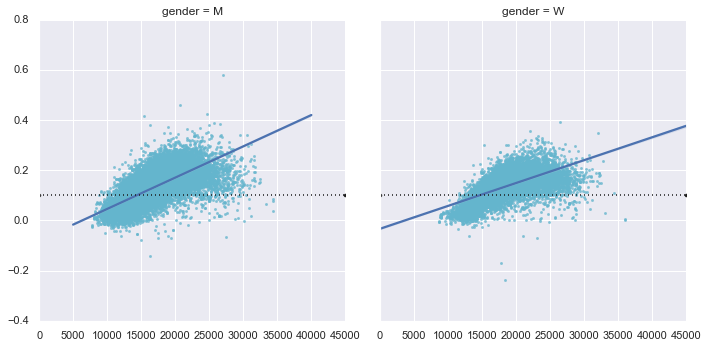

In [53]:
g = sns.lmplot('final_sec', 'split_frac', col='gender', data=data,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");

Apparently the people with fast splits are the elite runners who are finishing within ~15,000 seconds, or about 4 hours. People slower than that are much less likely to have a fast second split.